# The Impacts of Firearm and Gun Ownership in the United States of America
Final Tutorial for Introduction to Data Science (CMSC 320) \
Amy Tran

This project seeks to analyze the effects of firearm and gun ownership in the United States in addition to gun-related violence. The overarching question is the following: does a higher gun ownership rate increase the amount of gun violence? What's the degree of correlation between these variables? Through my work, I hope to take a deeper look into gun violence and gun ownership rates based on state and if firearm ownership rates can predict gun violence. \
\
First, let's discuss the study of data science and the process I used to reach my conclusions.

## Overview of Data Science
Data science is the application of computational and statistical techniques to address/gain insight into problem in the real world. In this project, I will be collecting data to create a batch gradient descent model to analyze the impacts of firearm ownership and gun-related violence rates in the United States.

### Data Science Lifecycle
1. Collect data
2. Clean data
3. Explore data (visualize)
4. Build model (machine learning model)
5. Interpretation

## Python and Package Imports
Before collecting any data, start by importing all the necessary packages such as pandas, numpy, matplotlib, etc\
\
To learn more about Python and the imported packages, feel free to visit the following websites:
- Python - https://www.python.org/
- Pandas - https://pandas.pydata.org/
- Numpy - https://numpy.org/
- Matplotlib - https://matplotlib.org/
- Seaborn - https://seaborn.pydata.org/
- Requests - https://pypi.org/project/requests/
- BeautifulSoup - https://pypi.org/project/beautifulsoup4/

In [457]:
# import all necessary packages

# packages to send HTTP requests and parse HTML 
import requests
from bs4 import BeautifulSoup

# packages for data analysis and manipulation
import pandas
import numpy

# packages to plot graphs and generate statistics
from matplotlib import pyplot as plt
import seaborn

## Firearm and Death Rates in the United States by State

The first table in the Wikipedia page "Firearm and Death Rates in the United States by State" provides firearm death rate statistics for each state in the United States, for the year 2019. The table includes the following columns: \
\
State: The fifty states \
Abbreviation: The postal abbreviation for each state \
Rate per 100,000 people: The firearm death rate per 100,000 people for each state in 2019 \
Gun Deaths: The total number of firearm deaths in each state in 2019 \
Murders: The number of murders by firearms in each state in 2019

### Data Collection

Starting with the first data source, I used Python's `requests` library to fetch data from the Wikipedia page on firearm death rates in the United States of America by state. `requests.get()` sends a GET request to the specified URL and returns a response object. Then, to check if the request was successful, I checked the `status_code` attribute of the response object. A status code of 200 indicates a successful get request and the webpage was retrieved successfully.

In [458]:
# Use requests to get the URL
r = requests.get('https://en.wikipedia.org/wiki/Firearm_death_rates_in_the_United_States_by_state#cite_note-NCHS-map-6')

# Check if the website request was successful
r.status_code

200

Next, I read in the table from the Wikipedia page by using the `BeautifulSoup` library to parse the HTML content and `pandas` library to extract the data table. By using index 0, I accessed the first table on the website.

In [459]:
# Read the text from the website
root = BeautifulSoup(r.text, 'html.parser')

# Find the table from the website
table = pandas.read_html(str(root.find('table')))[0]

# display the table
table

,State,Abbreviation,"Rate per 100,000 people",Gun Deaths,Murders,Unnamed: 5
0,Alaska *,AK,24.4,179,69,NaN
1,Mississippi *,MS,24.2,710,194,NaN
2,New Mexico *,NM,22.3,471,198,NaN
3,Wyoming *,WY,22.3,133,13,NaN
4,Alabama *,AL,22.2,1076,358,NaN
5,Louisiana *,LA,22.1,1013,544,NaN
6,Missouri *,MO,20.6,1252,568,NaN
7,South Carolina *,SC,19.9,1012,464,NaN
8,Arkansas *,AR,19.3,580,568,NaN
9,Montana *,MT,19.0,209,27,NaN


### Data Cleaning

To begin the data cleaning process, I used the `drop()` method from the `pandas` library to remove the column "Unnamed: 5" from the DataFrame.

In [460]:
# use drop() to remove the unnamed column filled with NaN
table = table.drop('Unnamed: 5', axis = 1)

# display the table
table

,State,Abbreviation,"Rate per 100,000 people",Gun Deaths,Murders
0,Alaska *,AK,24.4,179,69
1,Mississippi *,MS,24.2,710,194
2,New Mexico *,NM,22.3,471,198
3,Wyoming *,WY,22.3,133,13
4,Alabama *,AL,22.2,1076,358
5,Louisiana *,LA,22.1,1013,544
6,Missouri *,MO,20.6,1252,568
7,South Carolina *,SC,19.9,1012,464
8,Arkansas *,AR,19.3,580,568
9,Montana *,MT,19.0,209,27


Next, I modified the "State" column of the DataFrame. I used `str.replace()` to remove the asterisks (*) from the states' names.

In [461]:
# remove the * from the states' names
table['State'] = table['State'].str.replace('*', "")

# display the table
table

,State,Abbreviation,"Rate per 100,000 people",Gun Deaths,Murders
0,Alaska,AK,24.4,179,69
1,Mississippi,MS,24.2,710,194
2,New Mexico,NM,22.3,471,198
3,Wyoming,WY,22.3,133,13
4,Alabama,AL,22.2,1076,358
5,Louisiana,LA,22.1,1013,544
6,Missouri,MO,20.6,1252,568
7,South Carolina,SC,19.9,1012,464
8,Arkansas,AR,19.3,580,568
9,Montana,MT,19.0,209,27


I renamed the columns of the DataFrame with new names passed in as a dictionary using `rename()`. `inplace=True` ensures that the changes are applied directly to the original DataFrame.

In [462]:
# rename the columns
table.rename(columns = {'State': 'state', 'Abbreviation': 'abbreviation', 'Rate per 100,000 people': 'rate_per_100000_people', 'Gun Deaths': 'gun_deaths', 'Murders': 'murders'}, inplace = True)

# display the table
table

,state,abbreviation,rate_per_100000_people,gun_deaths,murders
0,Alaska,AK,24.4,179,69
1,Mississippi,MS,24.2,710,194
2,New Mexico,NM,22.3,471,198
3,Wyoming,WY,22.3,133,13
4,Alabama,AL,22.2,1076,358
5,Louisiana,LA,22.1,1013,544
6,Missouri,MO,20.6,1252,568
7,South Carolina,SC,19.9,1012,464
8,Arkansas,AR,19.3,580,568
9,Montana,MT,19.0,209,27


### Data Visualization

To better visualize the data, I used the `matplotlib` library to create a bar graph based on the DataFrame. I labeled the graph's title, x-axis, and y-axis to provide context for the data being shown. Ultimately, the bar graph will display gun deaths by state in 2019. There are three states that stand out for having the most amount of gun deaths.

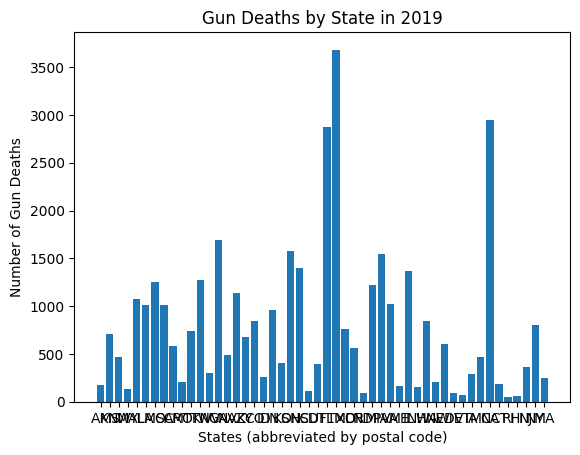

In [463]:
# label the graph's title, x-axis, and y-axis
plt.title("Gun Deaths by State in 2019")
plt.xlabel("States (abbreviated by postal code)")
plt.ylabel("Number of Gun Deaths")

# create a bar graph that graphs the gun deaths
plt.bar(table['abbreviation'], table['gun_deaths'])

# display the bar graph
plt.show()

I used the `matplotlib` library to create a bar graph based on the DataFrame. I labeled the graph's title, x-axis, and y-axis to provide context for the data being shown. This time, the bar graph will display murders by state in 2019. Similar to the previous bar graph, there are three states that stand out for having the most murders.

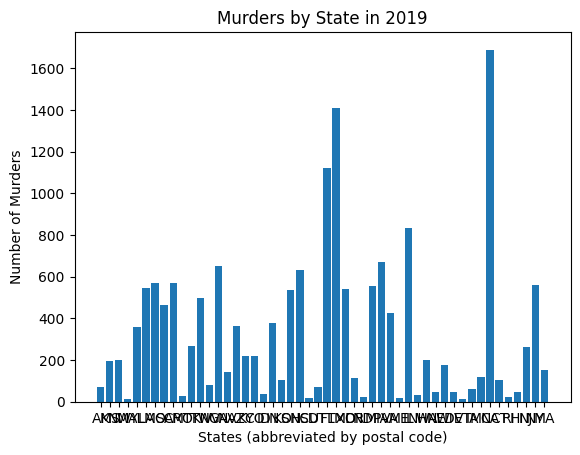

In [464]:
# label the graph's title, x-axis, and y-axis
plt.title("Murders by State in 2019")
plt.xlabel("States (abbreviated by postal code)")
plt.ylabel("Number of Murders")

# create a bar graph that graphs the number of murders
plt.bar(table['abbreviation'], table['murders'])

# display the bar graph
plt.show()

I used the `matplotlib` library to create a bar graph based on the DataFrame. I labeled the graph's title, x-axis, and y-axis to provide context for the data being shown. This time, the bar graph will display the firearm death rate by state in 2019.

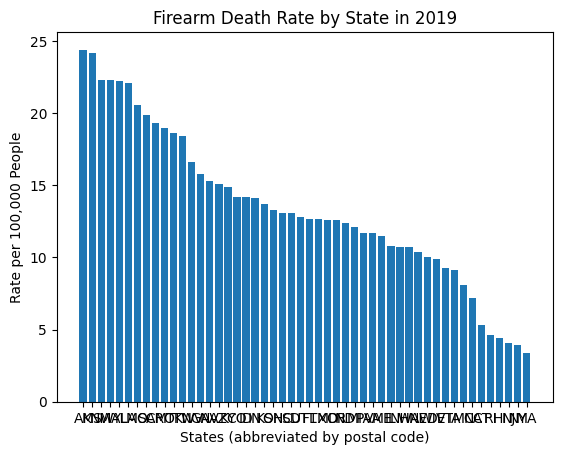

In [465]:
# label the graph's title, x-axis, and y-axis
plt.title("Firearm Death Rate by State in 2019")
plt.xlabel("States (abbreviated by postal code)")
plt.ylabel("Rate per 100,000 People")

# create a bar graph that graphs the rate per 100,000 people
plt.bar(table['abbreviation'], table['rate_per_100000_people'])

# display the bar graph
plt.show()

### Build Model

To create the machine learning model, I performed batch gradient descent. First, I sorted the table based on the "murders" column. Then, I got the independent variable (X) and dependent variable (y), and normalized X. In this model, the independent variable will be murders and the dependent variable will be the gun deaths.

In [466]:
sorted_table = table.sort_values(by = 'murders')

# get the independent variable (X) and dependent variable (y)
X = sorted_table['murders'].values.reshape(-1, 1)
y = sorted_table['gun_deaths'].index.values

# normalize the independent variable (X) for the gradient descent
X_normalized = (X - X.mean()) / X.std()

# display the sorted table
sorted_table

,state,abbreviation,rate_per_100000_people,gun_deaths,murders
40,Vermont,VT,9.3,67,11
3,Wyoming,WY,22.3,133,13
23,South Dakota,SD,13.1,113,17
33,Maine,ME,11.5,163,20
29,North Dakota,ND,12.4,93,24
45,Rhode Island,RI,4.6,48,25
9,Montana,MT,19.0,209,27
35,New Hampshire,NH,10.7,156,33
18,Idaho,ID,14.2,255,35
37,Nebraska,NE,10.4,205,45


I created the cost function (mean squared error) to calculate the mean squared error (MSE) between the predicted values and the actual values. X is the input data (independent variable), y is the actual values (dependent variable), and theta is the vector of coefficients (slope and intercept) of the linear regression model. This function measures how well the model's predictions match the actual values and optimizes the model's parameters by minimizing the mean squared error between the predicted values and the actual values.

In [467]:
# define the cost/loss function (mean squared error)
def compute_cost(X, y, theta):
    m = len(y) # get the size of the dataset
    predictions = X.dot(theta) # use the linear model to compute the predicted values
    cost = (1 / (2 * m)) * numpy.sum(numpy.square(predictions - y)) # calculate the squared errors and the mean squared error
    return cost

This function performs batch gradient descent to update the coefficients of the linear regression model iteratively. X is the input data (independent variable), y is the actual target values (dependent variable), theta is the vector of coefficients (slope and intercept) of the linear regression model, learning_rate is the step size to control the size of each update, and num_iterations is the number of iterations. At each iteration, the function calculates the gradient of the cost function with respect to the coefficients and then updates the parameters by moving in the opposite direction of the gradient to minimize the cost.

In [468]:
# define the gradient descent function
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y) # get the size of the dataset
    cost_history = numpy.zeros(num_iterations)

    for i in range(num_iterations):
        gradient = (1 / m) * X.T.dot(X.dot(theta) - y) # find the gradient of the model
        theta = theta - learning_rate * gradient
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

The obtained slope and intercept can be used to create a linear model that fits the data and visualize it as a linear regression line on the graph. As seen below, the slope is -7.938584110678337e-16 while the intercept is 40.

In [469]:
# initialize theta with zeros (slope and intercept)
theta = numpy.zeros((2, 1))

# create a column of ones to X_normalized for the intercept
X_normalized_with_intercept = numpy.c_[numpy.ones(X_normalized.shape[0]), X_normalized]

# perform batch gradient descent
theta, cost_history = gradient_descent(X_normalized_with_intercept, y, theta, 0.5, 1000)

# get the slope and intercept
slope, intercept = theta[1], theta[0]

# display the final values of slope and intercept
print("Slope (Coefficient):", slope[0])
print("Intercept:", intercept[0])

Slope (Coefficient): -7.938584110678337e-16
Intercept: 40.0


### Intepretation


The line graph below shows the relationship between murders and gun deaths in the United States in 2019. On a very broad level, there appears to be a positive correlation between murders and gun deaths. As the amount of murders increases, gun deaths also increase. But, there exists a lot of variance within the graph which explains the negative slope from the linear regression model above.

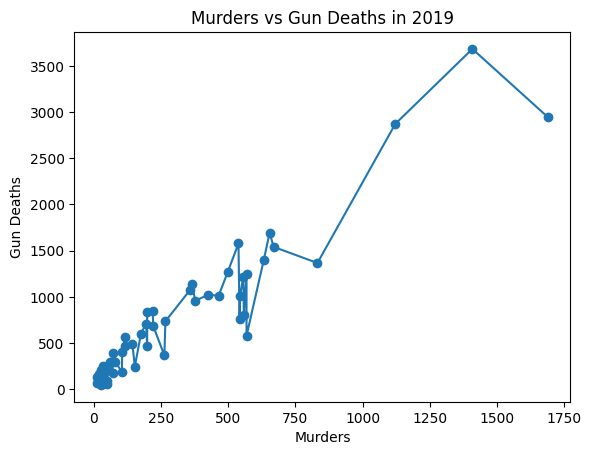

In [470]:
# label the graph's title, x-axis, and y-axis
plt.title("Murders vs Gun Deaths in 2019")
plt.xlabel("Murders")
plt.ylabel("Gun Deaths")

sorted_table = table.sort_values(by = 'murders')

# create a line graph to show the relationship between gun deaths and firearm death rate
plt.plot(sorted_table['murders'], sorted_table['gun_deaths'], marker='o')

# display the line graph
plt.show()

When sorting the table by the 10 highest firearm death rate, Alaska comes in first place with the highest rate: 24.4 firearm-related deaths out of 100,000 people. Next comes Mississippi with 24.4 firearm deaths out of 100,000. The rest of the table goes as follows: New Mexico (22.3), Wyoming (22.3), Alabama (22.2), Louisiana (22.1), Missouri (20.6), South Carolina (19.9), Arkansas (19.3), and Montana (19.0). 

In [471]:
# sort the table by firearm death rates in descending order
sorted_table = table.sort_values(by = 'rate_per_100000_people', ascending = False)

# get the top 10 states with the highest firearm death rates
top_states = sorted_table.head(10)

# display the table
top_states

,state,abbreviation,rate_per_100000_people,gun_deaths,murders
0,Alaska,AK,24.4,179,69
1,Mississippi,MS,24.2,710,194
2,New Mexico,NM,22.3,471,198
3,Wyoming,WY,22.3,133,13
4,Alabama,AL,22.2,1076,358
5,Louisiana,LA,22.1,1013,544
6,Missouri,MO,20.6,1252,568
7,South Carolina,SC,19.9,1012,464
8,Arkansas,AR,19.3,580,568
9,Montana,MT,19.0,209,27


Next, I sorted the table by the 10 lowest firearm death rates. Massachusetts has the lowest rate with 3.4 firearm deaths out of 100,000 people. Next comes New York with
3.9 and the rest as follows: New Jersey (4.1), Hawaii (4.4), Rhode Island (4.6), Connecticut (5.3), California (7.2), Minnesota (8.1), Iowa (9.1), and Vermont (9.3).

In [472]:
# get the top 10 states with the lowest firearm death rates
bottom_states = sorted_table.tail(10)

# display the table
bottom_states

,state,abbreviation,rate_per_100000_people,gun_deaths,murders
40,Vermont,VT,9.3,67,11
41,Iowa,IA,9.1,294,60
42,Minnesota,MN,8.1,465,117
43,California,CA,7.2,2945,1690
44,Connecticut,CT,5.3,190,104
45,Rhode Island,RI,4.6,48,25
46,Hawaii,HI,4.4,62,48
47,New Jersey,NJ,4.1,368,262
48,New York,NY,3.9,804,558
49,Massachusetts,MA,3.4,247,152


## Gun Ownership in the United States

This Wikipedia page, "Gun Ownership in the United States" includes data for population, murders and non-negligent manslaughter, murders, gun murders, and gun ownership percentage, calculating the rates per 100,000 people, in 2019. The population data is from the United States Census Bureau. Murder rates were calculated based on the FBI Uniform Crime Reports and the estimated census population of each state. The table includes the following columns: \
\
State: The fifty states \
Population: The population of the state \
Murder and Nonnegligent Manslaughter: The murders and nonnegligent manslaughters for each state in 2019 \
Murder: The murders for each state in 2019 \
Firearm Murder: The firearm murders for each state in 2019 \
Household Firearm Ownership (%): The percentage of households that own firearms for each state in 2019 \
Murder and Nonnegligent Manslaughter Rate (per 100,000): The murders and nonnegligent manslaughters per 100,000 people for each state in 2019 \ 
Murder Rate (per 100,000): The murders per 100,000 people for each state in 2019 \
Firearm Murder Rate (per 100,000): The firearm murders per 100,000 people for each state in 2019

### Data Collection

Continuing with the second data source, I used Python's `requests` library to fetch data from the Wikipedia page on Gun Violence in the United States of America by state. `requests.get()` sends a GET request to the specified URL and returns a response object. Then, to check if the request was successful, I checked the `status_code` attribute of the response object. A status code of 200 indicates a successful get request and the webpage was retrieved successfully.

In [473]:
# Use requests to get the URL
r = requests.get('https://en.wikipedia.org/wiki/Gun_violence_in_the_United_States_by_state#')

# Check if the website request was successful
r.status_code

200

Next, I read in all the tables from the Wikipedia page by using the `BeautifulSoup` library to parse the HTML content and `pandas` library to extract the data tables. I used a for-in loop to find the desired table containing data on murders, which has been displayed below.

In [474]:
# Read the text from the website
root = BeautifulSoup(r.text, 'html.parser')

# grab all the tables on the webpage
tables = root.find_all('table')

# find the desired table
for table in tables:
    if "murders" in str(table).lower():
        target_table = table

table = pandas.read_html(str(target_table))[0]

# display the table
table

,State,Population (2019) [4],Murder and Nonnegligent Manslaughter (2019) [5],Murder (2019)[a] [10],Firearm Murder (2019) [10],Household Firearm Ownership (%) (2016) [11],"Murder and Nonnegligent Manslaughter Rate (per 100,000) (2019)","Murder Rate (per 100,000) (2019)","Firearm Murder Rate (per 100,000) (2019)"
0,Alabama,4903185,358,-[b],-[b],52,7.3,14.2[12]-[b],23.6[13]-[b]
1,Alaska,731545,69,69,44,57,9.4,9.4,6.0
2,Arizona,7278717,365,337,213,36,5.0,4.6,2.9
3,Arkansas,3017804,242,231,177,51,8.0,7.7,5.9
4,California,39512223,1690,1679,1142,16,4.3,4.2,2.9
5,Colorado,5758736,218,209,135,37,3.8,3.6,2.3
6,Connecticut,3565287,104,104,65,18,2.9,2.9,1.8
7,Delaware,973764,48,48,40,38,4.9,4.9,4.1
8,Florida,21477737,1122,-[c],-[c],28,5.2,-[c],-[c]
9,Georgia,10617423,654,445,367,37,6.2,4.2,3.5


### Data Cleaning

To start cleaning the table, I began by listing out all of the columns in the DataFrame, using the `tolist()` function. The list of columns is displayed below.

In [475]:
# list all of the columns in the table
columns_list = table.columns.tolist()

# display the list of columns
columns_list

['State',
 'Population  (2019) [4]',
 'Murder and Nonnegligent Manslaughter  (2019) [5]',
 'Murder  (2019)[a] [10]',
 'Firearm  Murder  (2019) [10]',
 'Household  Firearm Ownership  (%) (2016) [11]',
 'Murder and Nonnegligent Manslaughter Rate  (per 100,000) (2019)',
 'Murder Rate  (per 100,000) (2019)',
 'Firearm Murder Rate  (per 100,000) (2019)']

Next, I used the `drop()` method from the `pandas` library to remove the following columns from the DataFrame: Murder and Nonnegligent Manslaughter, Murder, and Firearm Murder.

In [476]:
# remove the uneccessary columns
table = table.drop('Murder and Nonnegligent Manslaughter  (2019) [5]', axis = 1)
table = table.drop('Murder  (2019)[a] [10]', axis = 1)
table = table.drop('Firearm  Murder  (2019) [10]', axis = 1)

# display the table
table

,State,Population (2019) [4],Household Firearm Ownership (%) (2016) [11],"Murder and Nonnegligent Manslaughter Rate (per 100,000) (2019)","Murder Rate (per 100,000) (2019)","Firearm Murder Rate (per 100,000) (2019)"
0,Alabama,4903185,52,7.3,14.2[12]-[b],23.6[13]-[b]
1,Alaska,731545,57,9.4,9.4,6.0
2,Arizona,7278717,36,5.0,4.6,2.9
3,Arkansas,3017804,51,8.0,7.7,5.9
4,California,39512223,16,4.3,4.2,2.9
5,Colorado,5758736,37,3.8,3.6,2.3
6,Connecticut,3565287,18,2.9,2.9,1.8
7,Delaware,973764,38,4.9,4.9,4.1
8,Florida,21477737,28,5.2,-[c],-[c]
9,Georgia,10617423,37,6.2,4.2,3.5


I renamed the columns of the DataFrame with new names passed in as a dictionary using `rename()`. `inplace=True` ensures that the changes are applied directly to the original DataFrame.

In [477]:
# rename the columns
table.rename(columns = {'State': 'state',
                        'Population  (2019) [4]': 'population',
                        'Household  Firearm Ownership  (%) (2016) [11]': 'firearm_ownership',
                        'Murder and Nonnegligent Manslaughter Rate  (per 100,000) (2019)': 'murder_manslaughter_rate_100000',
                        'Murder Rate  (per 100,000) (2019)': 'murder_rate_100000',
                        'Firearm Murder Rate  (per 100,000) (2019)': 'firearm_murder_rate_100000'
                        }, inplace = True)

# display the table
table

,state,population,firearm_ownership,murder_manslaughter_rate_100000,murder_rate_100000,firearm_murder_rate_100000
0,Alabama,4903185,52,7.3,14.2[12]-[b],23.6[13]-[b]
1,Alaska,731545,57,9.4,9.4,6.0
2,Arizona,7278717,36,5.0,4.6,2.9
3,Arkansas,3017804,51,8.0,7.7,5.9
4,California,39512223,16,4.3,4.2,2.9
5,Colorado,5758736,37,3.8,3.6,2.3
6,Connecticut,3565287,18,2.9,2.9,1.8
7,Delaware,973764,38,4.9,4.9,4.1
8,Florida,21477737,28,5.2,-[c],-[c]
9,Georgia,10617423,37,6.2,4.2,3.5


I modified the columns of the DataFrame. I used `str.replace()` to remove the superscripts and replace missing data with NaN.

In [478]:
# remove the superscripts and missing values from the table
table['murder_rate_100000'] = table['murder_rate_100000'].str.replace('[12]-[b]', "")
table['murder_rate_100000'] = table['murder_rate_100000'].str.replace('-[c]', "NaN")
table['murder_rate_100000'] = table['murder_rate_100000'].str.replace('[d]', "")
table['firearm_murder_rate_100000'] = table['murder_rate_100000'].str.replace('[13]-[b]', "")

# display the table
table

,state,population,firearm_ownership,murder_manslaughter_rate_100000,murder_rate_100000,firearm_murder_rate_100000
0,Alabama,4903185,52,7.3,14.2,14.2
1,Alaska,731545,57,9.4,9.4,9.4
2,Arizona,7278717,36,5.0,4.6,4.6
3,Arkansas,3017804,51,8.0,7.7,7.7
4,California,39512223,16,4.3,4.2,4.2
5,Colorado,5758736,37,3.8,3.6,3.6
6,Connecticut,3565287,18,2.9,2.9,2.9
7,Delaware,973764,38,4.9,4.9,4.9
8,Florida,21477737,28,5.2,NaN,NaN
9,Georgia,10617423,37,6.2,4.2,4.2


### Data Visualization

I used the `matplotlib` library to create a bar graph based on the DataFrame. I labeled the graph's title, x-axis, and y-axis to provide context for the data being shown.

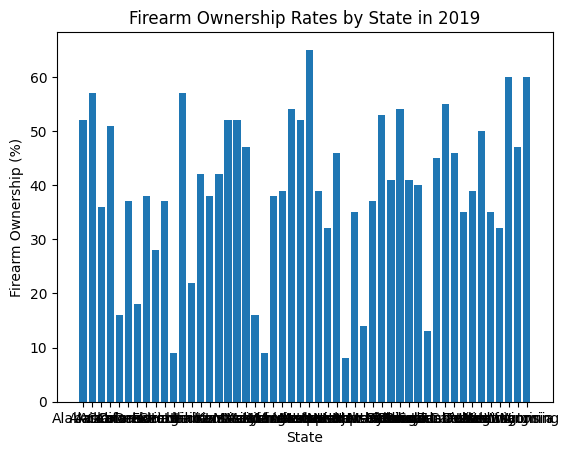

In [479]:
# label the graph's title, x-axis, and y-axis
plt.title("Firearm Ownership Rates by State in 2019")
plt.xlabel("State")
plt.ylabel("Firearm Ownership (%)")

# create a bar graph that graphs the rate per 100,000 people
plt.bar(table['state'], table['firearm_ownership'])

# display the bar graph
plt.show()

To display the states with a majority of their population owning firearms, I sorted the table in descending order. 65% of Montana's population owns a firearm. Next came West Virginia and Wyoming with a 60% firearm ownership rate. The rest of the list goes as follows: Alaska and Idaho (57%), South Dakota (55%), Oklahoma and Mississippi (54%), North Dakota (53%), Alabama, Kentucky, Missouri, and Louisiana (52%), and Arkansas (51%). An observation I made is that Alabama and Louisiana stood out for having the highest murder and firearm murder rates compared to all the other states on this list.

In [480]:
# sort the table by firearm ownership rates in descending order
sorted_table = table.sort_values(by = 'firearm_ownership', ascending = False)

# get the top 14 states with the highest firearm ownership rates
top_firearm_ownership = sorted_table.head(14)

# display the table
top_firearm_ownership

,state,population,firearm_ownership,murder_manslaughter_rate_100000,murder_rate_100000,firearm_murder_rate_100000
25,Montana,1068778,65,2.5,2.5,2.5
47,West Virginia,1792147,60,4.4,4.0,4.0
49,Wyoming,578759,60,2.2,2.2,2.2
1,Alaska,731545,57,9.4,9.4,9.4
11,Idaho,1787065,57,2.0,2.0,2.0
40,South Dakota,884659,55,1.9,2.1,2.1
35,Oklahoma,3956971,54,6.7,6.7,6.7
23,Mississippi,2976149,54,11.2,6.4,6.4
33,North Dakota,762062,53,3.1,3.4,3.4
0,Alabama,4903185,52,7.3,14.2,14.2


Conversely, the table below displays the ten states with the lowest firearm rates. New Jersey has the lowest firearm ownership in the United States with 8%. Next came Massachusetts and Hawaii with 9%. The rest of the table is as follows: Rhode Island (13%), New York (14%), Maryland and California (16%), Connecticut (18%), Illinois (22%), and Florida (28%). Maryland stands out for having the highest murder and manslaughter, murder, and firearm murder rates out of all the other states on the list.

In [481]:
# get the top 10 states with the lowest firearm ownership rates
bottom_firearm_ownership = sorted_table.tail(10)

# display the table
bottom_firearm_ownership

,state,population,firearm_ownership,murder_manslaughter_rate_100000,murder_rate_100000,firearm_murder_rate_100000
8,Florida,21477737,28,5.2,NaN,NaN
12,Illinois,12671821,22,6.6,6.1,6.1
6,Connecticut,3565287,18,2.9,2.9,2.9
4,California,39512223,16,4.3,4.2,4.2
19,Maryland,6045680,16,9.0,9.1,9.1
31,New York,19453561,14,2.9,2.8,2.8
38,Rhode Island,1059361,13,2.4,2.4,2.4
10,Hawaii,1415872,9,3.4,2.3,2.3
20,Massachusetts,6892503,9,2.2,2.1,2.1
29,New Jersey,8882190,8,2.9,2.9,2.9


Next, I created a bar graph to show the murder and manslaughter rates by state.

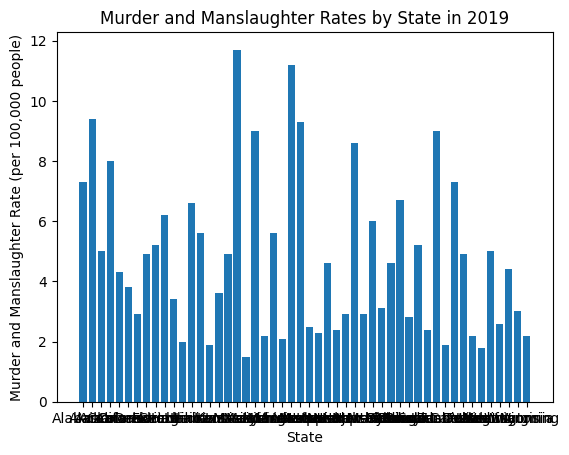

In [482]:
# label the graph's title, x-axis, and y-axis
plt.title("Murder and Manslaughter Rates by State in 2019")
plt.xlabel("State")
plt.ylabel("Murder and Manslaughter Rate (per 100,000 people)")

# create a bar graph that graphs the rate per 100,000 people
plt.bar(table['state'], table['murder_manslaughter_rate_100000'])

# display the bar graph
plt.show()

To display the top ten states with the highest murder and manslaughter rates, I sorted the table in descending order. Louisiana comes in first place for having the highest murder/manslaughter rate out of 100,000 people in the United States with 11.7. The rest of the list is as follows: Mississippi (11.2), Alaska (9.4), Missouri (9.3), Maryland (9.0), South Carolina (9.0), New Mexico (8.6), Arkansas (8.0), and Tennessee and Alabama (7.3). Maryland stands out for having a high murder and manslaughter rate while having the lowest firearm ownership percentage on the list.

In [483]:
# sort the table by murder_manslaughter_rate_100000 in descending order
sorted_table = table.sort_values(by = 'murder_manslaughter_rate_100000', ascending = False)

# get the top 10 states with the highest murder_manslaughter_rate_100000
top_murder_manslaughter_rate_100000 = sorted_table.head(10)

# display the table
top_murder_manslaughter_rate_100000

,state,population,firearm_ownership,murder_manslaughter_rate_100000,murder_rate_100000,firearm_murder_rate_100000
17,Louisiana,4648794,52,11.7,11.2,11.2
23,Mississippi,2976149,54,11.2,6.4,6.4
1,Alaska,731545,57,9.4,9.4,9.4
24,Missouri,6137428,52,9.3,9.2,9.2
19,Maryland,6045680,16,9.0,9.1,9.1
39,South Carolina,5148714,45,9.0,8.6,8.6
30,New Mexico,2096829,35,8.6,7.0,7.0
3,Arkansas,3017804,51,8.0,7.7,7.7
41,Tennessee,6829174,46,7.3,7.3,7.3
0,Alabama,4903185,52,7.3,14.2,14.2


### Build Model

To create the machine learning model, I performed batch gradient descent. First, I sorted the table based on the "firearm ownership" column. Then, I got the independent variable (X) and dependent variable (y), and normalized X. In this model, the independent variable will be firearm ownership and the dependent variable will be the murder and manslaughter rate per 100,000 people.

In [484]:
sorted_table = table.sort_values(by = 'firearm_ownership')

# get the independent variable (X) and dependent variable (y)
X = sorted_table['firearm_ownership'].values.reshape(-1, 1)
y = sorted_table['murder_manslaughter_rate_100000'].index.values

# normalize the independent variable (X) for the gradient descent
X_normalized = (X - X.mean()) / X.std()

# display the sorted table
sorted_table

,state,population,firearm_ownership,murder_manslaughter_rate_100000,murder_rate_100000,firearm_murder_rate_100000
29,New Jersey,8882190,8,2.9,2.9,2.9
20,Massachusetts,6892503,9,2.2,2.1,2.1
10,Hawaii,1415872,9,3.4,2.3,2.3
38,Rhode Island,1059361,13,2.4,2.4,2.4
31,New York,19453561,14,2.9,2.8,2.8
4,California,39512223,16,4.3,4.2,4.2
19,Maryland,6045680,16,9.0,9.1,9.1
6,Connecticut,3565287,18,2.9,2.9,2.9
12,Illinois,12671821,22,6.6,6.1,6.1
8,Florida,21477737,28,5.2,NaN,NaN


I created the cost function (mean squared error) to calculate the mean squared error (MSE) between the predicted values and the actual values. X is the input data (independent variable), y is the actual values (dependent variable), and theta is the vector of coefficients (slope and intercept) of the linear regression model. This function measures how well the model's predictions match the actual values and optimizes the model's parameters by minimizing the mean squared error between the predicted values and the actual values.

In [485]:
# define the cost/loss function (mean squared error)
def compute_cost(X, y, theta):
    m = len(y) # get the size of the dataset
    predictions = X.dot(theta) # use the linear model to compute the predicted values
    cost = (1 / (2 * m)) * numpy.sum(numpy.square(predictions - y)) # calculate the squared errors and the mean squared error
    return cost

This function performs batch gradient descent to update the coefficients of the linear regression model iteratively. X is the input data (independent variable), y is the actual target values (dependent variable), theta is the vector of coefficients (slope and intercept) of the linear regression model, learning_rate is the step size to control the size of each update, and num_iterations is the number of iterations. At each iteration, the function calculates the gradient of the cost function with respect to the coefficients and then updates the parameters by moving in the opposite direction of the gradient to minimize the cost.

In [486]:
# define the gradient descent function
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y) # get the size of the dataset
    cost_history = numpy.zeros(num_iterations)

    for i in range(num_iterations):
        gradient = (1 / m) * X.T.dot(X.dot(theta) - y) # find the gradient of the model
        theta = theta - learning_rate * gradient
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

The obtained slope and intercept can be used to create a linear model that fits the data and visualize it as a linear regression line on the graph. As seen below, the slope is -2.5757174171303674e-16 while the intercept is 29.

In [487]:
# initialize theta with zeros (slope and intercept)
theta = numpy.zeros((2, 1))

# create a column of ones to X_normalized for the intercept
X_normalized_with_intercept = numpy.c_[numpy.ones(X_normalized.shape[0]), X_normalized]

# perform batch gradient descent
theta, cost_history = gradient_descent(X_normalized_with_intercept, y, theta, 0.5, 1000)

# get the slope and intercept
slope, intercept = theta[1], theta[0]

# display the final values of slope and intercept
print("Slope (Coefficient):", slope[0])
print("Intercept:", intercept[0])

Slope (Coefficient): -2.5757174171303674e-16
Intercept: 29.0


### Interpretation

To better visualize the linear regression model, I created a scatter plot to compare the firearm ownership and murder and manslaughter rate. On top of the data points, I also graphed the linear regression line. As seen below, the variance between the line of best fit and data points is very high. There does not appear to be a clear correlation between firearm ownership and murders/manslaughters.

Text(0, 0.5, 'Murder and Manslaughter Rate (per 100,000 people)')

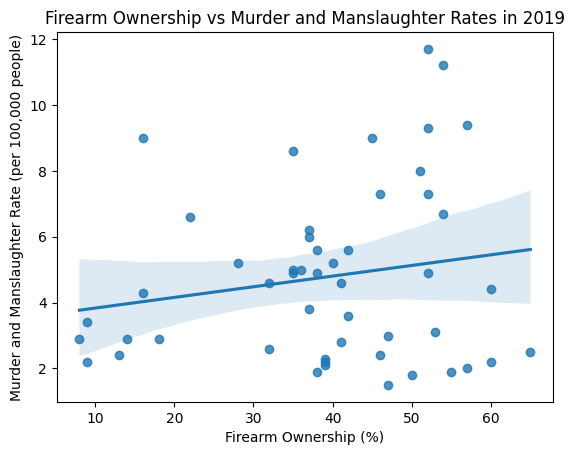

In [488]:
temp_table = table[['firearm_ownership', 'murder_manslaughter_rate_100000']]

seaborn.regplot(x = "firearm_ownership", y = "murder_manslaughter_rate_100000", data = temp_table)

# label the graph's title, x-axis, and y-axis
plt.title("Firearm Ownership vs Murder and Manslaughter Rates in 2019")
plt.xlabel("Firearm Ownership (%)")
plt.ylabel("Murder and Manslaughter Rate (per 100,000 people)")


## Conclusion

Given the data that has been collected, the conclusion drawn is that firearm ownership rates has limited correlation to the homicide rates of the areas which utilize them. The variance in the data collected as well as variables such as murder and manslaughter rates demonstrate that it is negligible as a statistic to validate gun control efforts. The idea behind justifying firearm restrictions is that it either prevents or minimizes the damage done to communities. However, the data however doesn't demonstrate that either anti-gun nor pro-gun efforts significantly influence violence rates in the United States. Therefore, future studies should focus on variables such as poverty, education levels, and mental health to uncover the means to reduce violence and death across our nation.

## References
- https://manhattan.institute/article/more-guns-same-amount-of-crime-analyzing-the-effect-of-right-to-carry-laws-on-homicide-and-violent-crime
- https://www.rand.org/research/gun-policy/gun-ownership.html
- https://www.sciencedirect.com/science/article/abs/pii/S004723521400107X
- https://en.wikipedia.org/wiki/Firearm_death_rates_in_the_United_States_by_state#cite_note-NCHS-map-6
- https://en.wikipedia.org/wiki/Gun_violence_in_the_United_States_by_state#
- https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_intentional_homicide_rate